In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


data = pd.read_csv('balanced_migraine_data.csv')
df = pd.DataFrame(data)


label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])


X = df.drop(columns=['Type'])
y = df['Type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1349, 23), (338, 23), (1349,), (338,))

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100


C:\Users\diya0\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2071 - loss: 2.0684 - val_accuracy: 0.4667 - val_loss: 1.8144
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 1.7445 - val_accuracy: 0.6037 - val_loss: 1.4440
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4221 - loss: 1.5651 - val_accuracy: 0.6815 - val_loss: 1.1310
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5384 - loss: 1.2886 - val_accuracy: 0.7444 - val_loss: 0.9192
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 1.1936 - val_accuracy: 0.8037 - val_loss: 0.7400
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6264 - loss: 1.0650 - val_accuracy: 0.8296 - val_loss: 0.6216
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 0.8599 - val_accuracy: 0.8519 - val_loss: 0.5271
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.8561 - val_accuracy: 0.8444 - val_loss: 0.4

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred_classes, average="macro") * 100:.2f}%')
print(f'Reacll: {recall_score(y_test, y_pred_classes, average="macro") * 100:.2f}%')
print(f'F1 Score: {f1_score(y_test, y_pred_classes, average="macro") * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 93.79%
Precision: 93.50%
Reacll: 93.66%
F1 Score: 93.53%
Confusion Matrix:
[[52  1  2  0  1  1  0]
 [ 1 47  0  0  0  1  0]
 [ 0  0 50  0  0  0  0]
 [ 0  0  1 48  0  2  0]
 [ 1  0  0  0 35  2  0]
 [ 2  1  0  0  5 37  0]
 [ 0  0  0  0  0  0 48]]


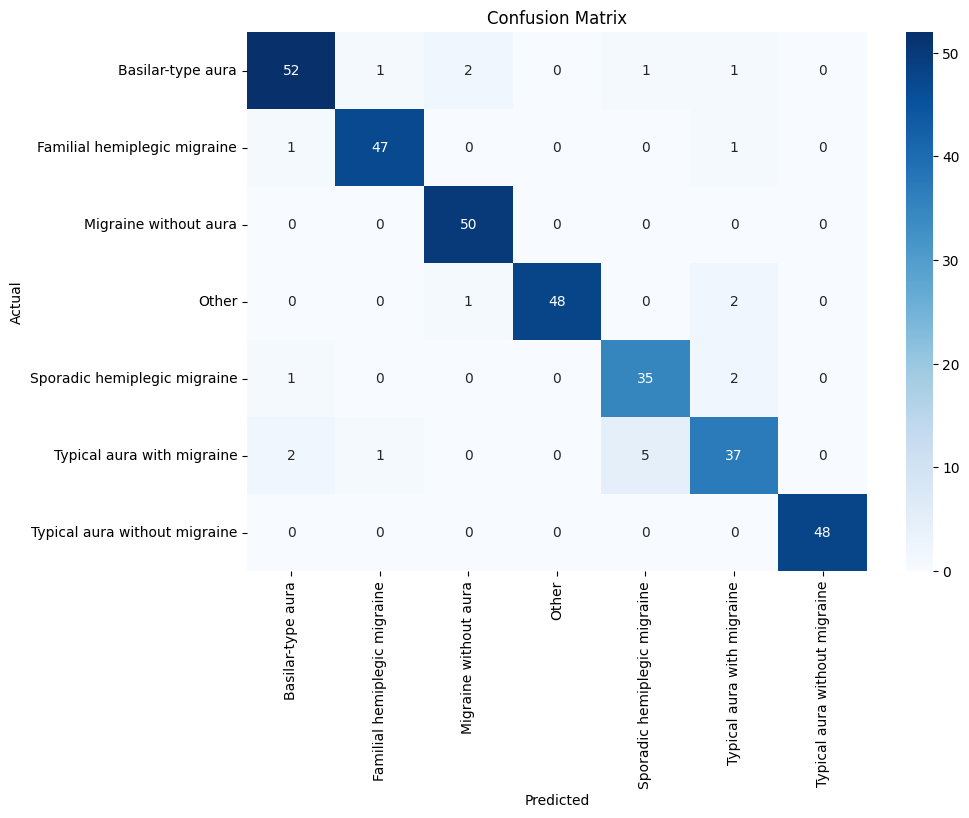

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

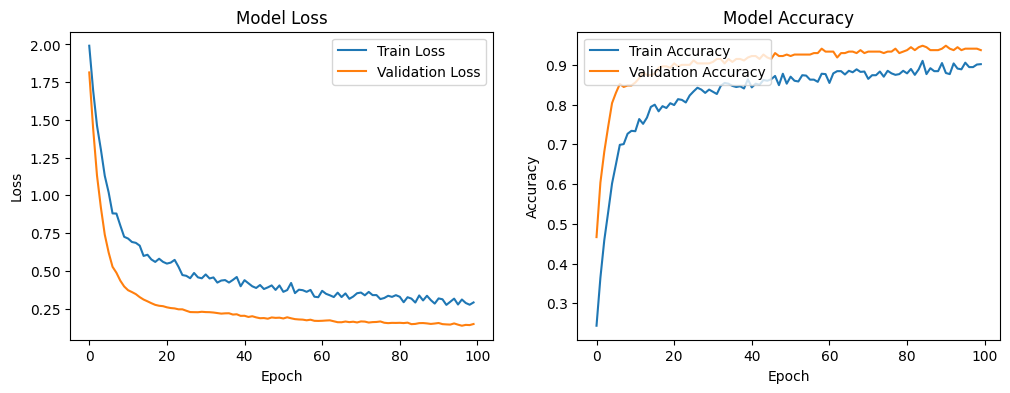

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
   

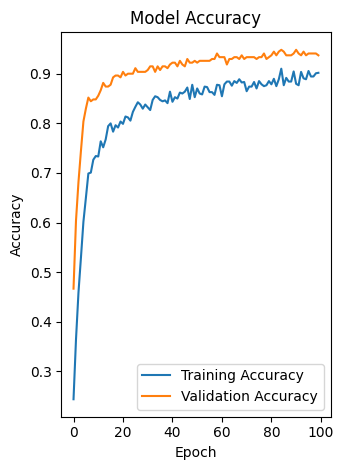

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()